In [16]:
#Inital Imports
import numpy as np
import networkx as nx
import pandas as pd
import gurobipy as gb
import matplotlib.pyplot as plt
from gurobipy import GRB

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Step 1: Parse Network Topology and load Demands

In [17]:
# load data fram using pandas for topology
df = pd.read_csv("data/Sprint/topology.txt", delimiter=r"\s+")

# Create Graph

G = nx.from_pandas_edgelist(df, 'from_node', 'to_node', ['capacity', 'prob_failure'])

## Step 2: Visualize Graph

{(10, 9): Text(0.920626759959206, 0.27032038693904664, '1000000000'),
 (10, 1): Text(0.42884249549647624, -0.49491071161947087, '1000000000'),
 (10, 7): Text(0.020253514591924093, 0.14086629644921533, '1000000000'),
 (10, 6): Text(0.707707555685761, -0.45481597859850814, '1000000000'),
 (10, 4): Text(0.42884258490344296, 0.4949107170380748, '1000000000'),
 (9, 8): Text(0.6283343007438058, 0.7251363682468568, '1000000000'),
 (9, 4): Text(0.3494693448626489, 0.7652311012678195, '1000000000'),
 (8, 3): Text(-0.11972279239934794, 0.8326908033940423, '1000000000'),
 (8, 7): Text(-0.272038944623476, 0.5956822777570254, '1000000000'),
 (8, 4): Text(0.1365501256880428, 0.949726698345885, '1000000000'),
 (4, 3): Text(-0.3985877482805049, 0.872785536415005, '1000000000'),
 (4, 0): Text(-0.550903900504633, 0.35404443819932263, '1000000000'),
 (4, 5): Text(0.34946931506032664, 0.2245902732036857, '1000000000'),
 (7, 0): Text(-0.9594929708161518, 1.76104631710583e-08, '1000000000'),
 (7, 6): Text(-

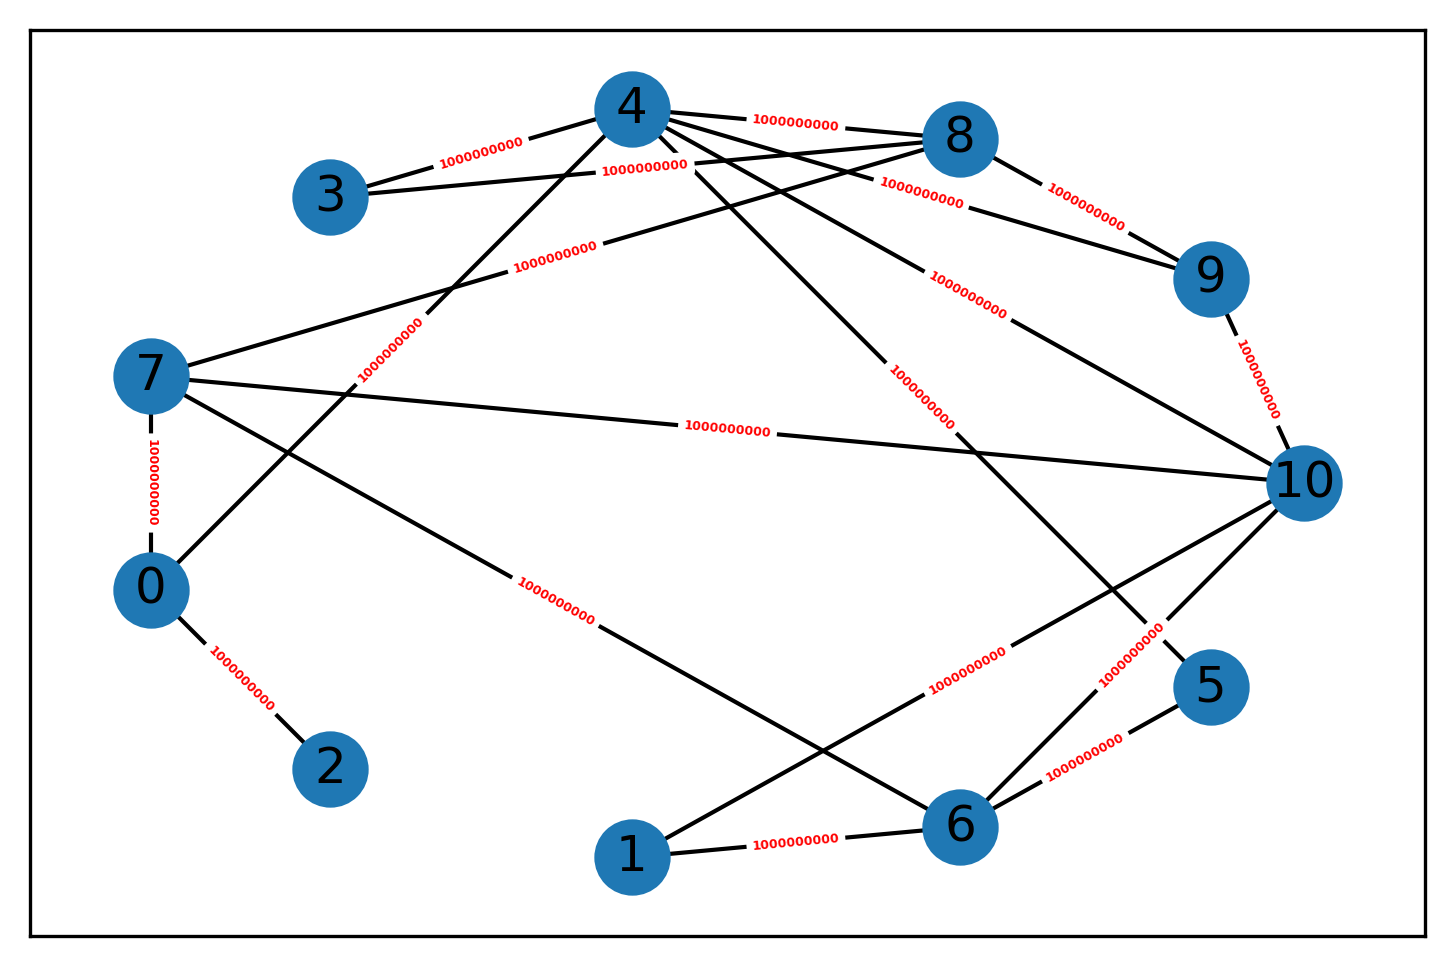

In [18]:
#Draw loaded graph
# spring layout prevents graph from
# becoming too clustered
layout = nx.circular_layout(G)
# draw node, edges, and labels sperately
nx.draw_networkx_labels(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout)
# only add capacities as labels
edge_labels = dict([((source, dest), G[source][dest]["capacity"]) for source, dest in G.edges])
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels= edge_labels,font_color="red", font_weight="bold", font_size = 3)

In [19]:
## Get paths
## for each node, find paths to destination node
## paths[(i,j)] = list of paths specified by edges
paths = {}

num_paths = {}

n=10

for i in range(0,n+1):
    for j in range(0,n+1):
        path_gen = nx.all_simple_edge_paths(G, source=i, target=j, cutoff=5)
        p = list(path_gen)
        num_paths[(i,j)] = len(p)
        for k in range(len(p)):
            paths[(i,j,k)] = p[k]

print(paths[1,2,0])


[(1, 10), (10, 9), (9, 4), (4, 0), (0, 2)]


## Step 3: Parse Traffic Demands

In [20]:
demands = np.loadtxt("data/Sprint/demand.txt")
## get the maximum value for each column
## reshape demands matrix
demands_matrix = np.amax(demands, axis = 0).reshape(11,11)

demands_dict = {}
for i in range(11):
    for j in range(11):
        demands_dict[(i,j)] = demands[i][j]

## Step 4: Traffic Algorithm: Maximize Total Throughput


In [21]:
#TODO
#Decision variables:

#edge current flows and capacities
flow_matrix = {}
capacity_matrix = {}
for key, value in edge_labels:
    flow_matrix[key] = 0
    capacity_matrix[key] = value



# edge_time, demand = demands_dict


#If flow is 0, edge is not active

#for each edge in edges: set in some array/matrix all the possible edges

#----------------------------

#Optimization function:

#Sum of the flows of all of the edges

model = gb.Model()

edges,capacities = edge_labels.keys(), edge_labels.values()

print(edges)

flow = model.addVars(edges, obj=capacities, name="flow")

model.setObjective(gb.quicksum(flow_matrix.values()), gb.GRB_MAXIMIZE)


#----------------------------

#Constraints: 

#Capacity check: Flow on edge (u, v) <= capacity (u, v)

#Demand reqs: flow into node u = demand u: f_in(u) - f_out(u) = demand(u) https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/flowext.pdf

#Conservation: Flow into node u = flow out of node u???

# model.addConstr(flow_matrix[(t, u, v)] <= capacity_matrix[t, u, v]])
# model.addConstr(flow_in[t, u] - flow_out[t, u])

dict_keys([(10, 9), (10, 1), (10, 7), (10, 6), (10, 4), (9, 8), (9, 4), (8, 3), (8, 7), (8, 4), (4, 3), (4, 0), (4, 5), (7, 0), (7, 6), (0, 2), (1, 6), (6, 5)])


AttributeError: module 'gurobipy' has no attribute 'GRB_MAXIMIZE'

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 139 rows, 1734 columns and 8942 nonzeros
Model fingerprint: 0xfedc8505
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+09]
Presolve removed 139 rows and 1734 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2145631e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  4.214563058e+06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17031.0
79727.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
24647.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11409.0
0.0
0.

{(0, 7): Text(-0.9594929708161518, 1.76104631710583e-08, '565490.0'),
 (0, 4): Text(-0.550903900504633, 0.35404443819932263, '1164406.0'),
 (0, 2): Text(-0.807176848394346, -0.5187410657040582, '1083854.0'),
 (7, 8): Text(-0.272038944623476, 0.5956822777570254, '370651.0'),
 (7, 10): Text(0.020253514591924093, 0.14086629644921533, '573794.0'),
 (7, 6): Text(-0.2720389297223149, -0.3139496848585948, '1278388.0'),
 (8, 9): Text(0.6283343007438058, 0.7251363682468568, '129883.0'),
 (8, 4): Text(0.1365501256880428, 0.949726698345885, '445328.0'),
 (8, 3): Text(-0.11972279239934794, 0.8326908033940423, '124483.0'),
 (9, 10): Text(0.920626759959206, 0.27032038693904664, '132728.0'),
 (9, 4): Text(0.3494693448626489, 0.7652311012678195, '380923.0'),
 (10, 1): Text(0.42884249549647624, -0.49491071161947087, '26747.0'),
 (10, 4): Text(0.42884258490344296, 0.4949107170380748, '3370679.0'),
 (10, 6): Text(0.707707555685761, -0.45481597859850814, '1361267.0'),
 (1, 6): Text(0.13655005118223723, -0

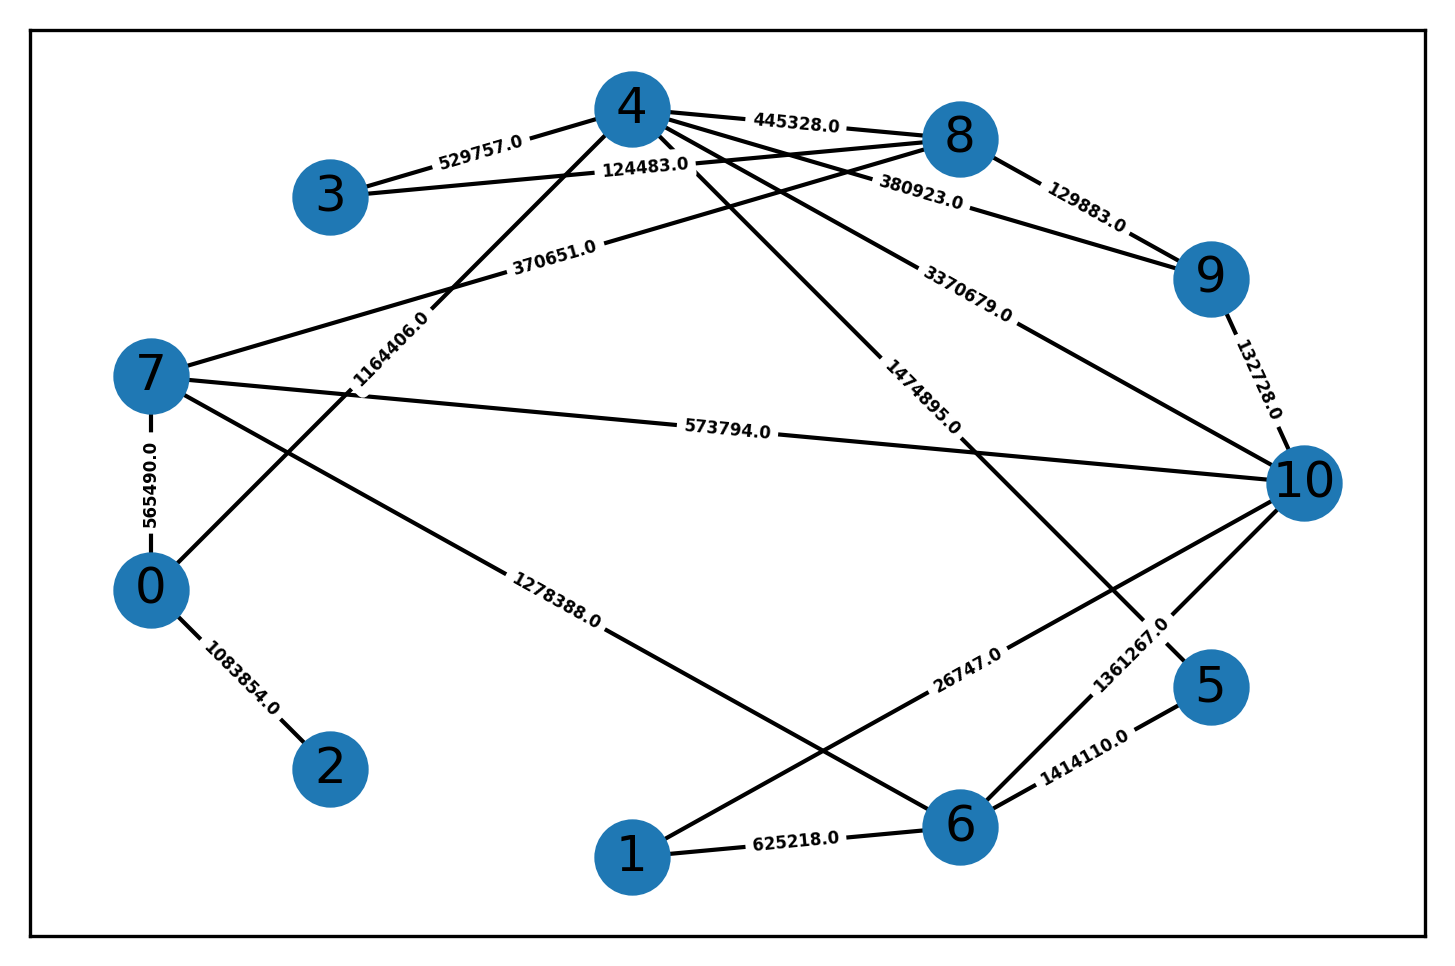

In [22]:
# new model
m = gb.Model("step4")

# add a variable for each tunnel
path_vars = m.addVars(paths, name = "path_flow")

# dictionary mapping edges to variables representing paths edge is in
edge_flow = gb.tupledict([((source, dest), []) for source, dest in G.edges])


# iterate through all paths
for (i,j,k) in path_vars:
    path = paths[(i,j,k)]
    # iterate each edge in a path
    for src,dest in path:
        # add variable to correct edge
        if (src,dest) in edge_flow:
            edge_flow[(src,dest)].append(path_vars[i,j,k])
        else:
            edge_flow[(dest,src)].append(path_vars[i,j,k])

# add capacity constraint
for i,j in edge_flow:
    m.addConstr(sum(edge_flow[(i,j)]) <= edge_labels[(i,j)])

m.addConstrs(path_vars.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

m.setObjective(path_vars.sum(), GRB.MAXIMIZE)

m.optimize()

path_vars

G_Prime = nx.Graph()

for path_key in path_vars:
    path = paths[path_key]
    val = round(path_vars[path_key].X,0)
    print(val)
    for (src, dest) in path:
        if G_Prime.has_edge(src, dest):
            G_Prime[src][dest]['weight'] += val
        else:
            G_Prime.add_edge(src, dest, weight = val)
        
GPrime_labels = nx.get_edge_attributes(G_Prime, "weight")

# draw node, edges, and labels sperately
nx.draw_networkx_labels(G_Prime, pos=layout)
nx.draw_networkx_nodes(G_Prime, pos=layout)
nx.draw_networkx_edges(G_Prime, pos=layout)
# only add capacities as labels
edge_labels = dict([((source, dest), G[source][dest]["capacity"]) for source, dest in G.edges])
nx.draw_networkx_edge_labels(G_Prime, pos=layout, edge_labels= GPrime_labels, font_weight="bold", font_size = 4)




## Step 5: Traffic Algorithm: Maximize Link Utilization

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 139 rows, 1734 columns and 8942 nonzeros
Model fingerprint: 0xfedc8505
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+09]
Presolve removed 139 rows and 1734 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2145631e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  4.214563058e+06


{(10, 9): Text(0.920626759959206, 0.27032038693904664, '132728'),
 (10, 1): Text(0.42884249549647624, -0.49491071161947087, '26747'),
 (10, 7): Text(0.020253514591924093, 0.14086629644921533, '573793'),
 (10, 6): Text(0.707707555685761, -0.45481597859850814, '1361268'),
 (10, 4): Text(0.42884258490344296, 0.4949107170380748, '3370679'),
 (9, 8): Text(0.6283343007438058, 0.7251363682468568, '129883'),
 (9, 4): Text(0.3494693448626489, 0.7652311012678195, '380922'),
 (1, 6): Text(0.13655005118223723, -0.949726692927281, '625220'),
 (7, 8): Text(-0.272038944623476, 0.5956822777570254, '370651'),
 (7, 0): Text(-0.9594929708161518, 1.76104631710583e-08, '565489'),
 (7, 6): Text(-0.2720389297223149, -0.3139496848585948, '1278388'),
 (6, 5): Text(0.6283342858426447, -0.7251364224328973, '1414109'),
 (4, 8): Text(0.1365501256880428, 0.949726698345885, '445329'),
 (4, 3): Text(-0.3985877482805049, 0.872785536415005, '529757'),
 (4, 0): Text(-0.550903900504633, 0.35404443819932263, '1164405'),
 

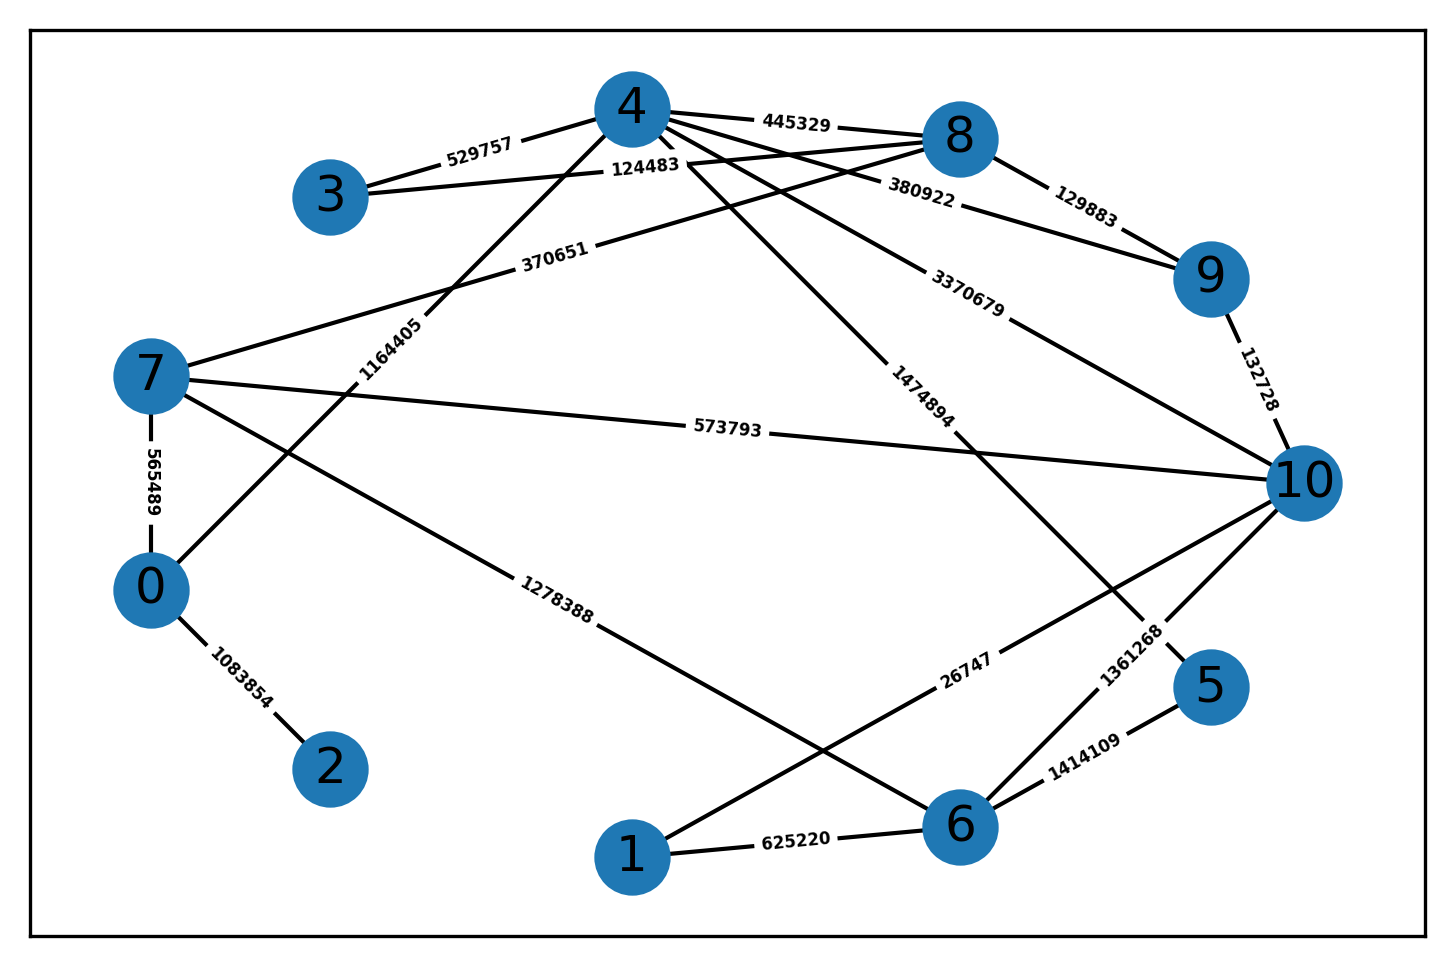

In [23]:
#Same as step 4 on a new model
m_prime = gb.Model("step5")
path_vars5 = m_prime.addVars(paths, name = "path_flow")
edge_flow5 = gb.tupledict([((source, dest), []) for source, dest in G.edges])

for (i,j,k) in path_vars5:
    path = paths[(i,j,k)]
    for src,dest in path:
        if (src,dest) in edge_flow5:
            edge_flow5[(src,dest)].append(path_vars5[i,j,k])
        else:
            edge_flow5[(dest,src)].append(path_vars5[i,j,k])

# add capacity constraint
for i,j in edge_flow5:
    m_prime.addConstr(sum(edge_flow5[(i,j)]) <= edge_labels[(i,j)])


#***new for step 5*** Need to add constraint that the maximum link value needs to be reduced 

for i,j in edge_flow5:
    #Percentage of load on a link
    #edge_ratio = sum(edge_flow5[(i,j)])/edge_labels[(i,j)]
    m_prime.setObjective(sum(edge_flow5[(i,j)])/edge_labels[(i,j)], GRB.MINIMIZE)

#having demand bounded like this will push all nodes to have "0" for flow, so we want to maximize the throughput as well (which is why we reuse step 4 constraints)

m_prime.addConstrs(path_vars5.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

m_prime.setObjective(path_vars5.sum(), GRB.MAXIMIZE)

m_prime.optimize()

path_vars5

#Alternative written of step 4 visualization using edge_flows:
G_Prime2 = nx.Graph()

for i,j in edge_flow5:
    G_Prime2.add_edge(i, j, weight = round(sum(edge_flow5[i,j]).getValue()))

GPrime2_labels = nx.get_edge_attributes(G_Prime2, "weight")
# draw node, edges, and labels sperately
nx.draw_networkx_labels(G_Prime2, pos=layout)
nx.draw_networkx_nodes(G_Prime2, pos=layout)
nx.draw_networkx_edges(G_Prime2, pos=layout)
# only add capacities as labels
nx.draw_networkx_edge_labels(G_Prime2, pos=layout, edge_labels= GPrime2_labels, font_weight="bold", font_size = 4)


## Step 6: Compare Algorithms

TODO

## Step 7 (EXTRA CREDIT): Scaling with Topology Size